In [1]:
#IST 718_Final Project_Global Temperature Rise _Climate change Impact
# Data sets are obtained from Kaggle and data world
# Basic idea is explore the data 
# Clean the data  and combine the data by joining the two different data files
# Time Series Analysis - ARIMA, XARIMA, RF 
# SVM's if possible
# Some better and informative visualizations
# Over all data measures, predictions and issues and other Data Model with "OSEMIN" and "7'C's" ; 

################################REFERENCES ######################
## Also referred the following iterative approach of ploting ggplots in python
## https://mesfind.github.io/python-ecology-lesson/06-visualization-ggplot-python/
##https://climate--change--global.herokuapp.com/

########MODELING AND FORECASTING ANALYSIS
#This note book is developed only for the modelling , forecasting only 
# Was able to obtain the resuslts for ARIMA , Certain level of null hypothesis, Stationary setting, Plots representing the resuidals ..etc.,

##OTHER NOTES
#Unable to produce the results for the future dates dated for 100 years getting out of bound exceptions

In [2]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline         

import datetime
import copy
# Plotly to work on jupyter notebook
# installation from conda "$ conda install -c plotly plotly=5.10.0"

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [3]:
#Load the temperature dataset
# Read the data
Tdata = pd.read_csv('GT.csv', header=0, index_col=0, parse_dates=True, squeeze=True) # Parsing the data 
#Hence pandas can understand that it is dealing with dates not with srrings
Tdata.dropna(inplace = True)
Tdata.head()
print(Tdata.shape) # Get the size of data in terms of rows and colums
print(Tdata.info)

(1992, 8)
<bound method DataFrame.info of             LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1850-01-01                   0.749                              1.105   
1850-02-01                   3.071                              1.275   
1850-03-01                   4.954                              0.955   
1850-04-01                   7.217                              0.665   
1850-05-01                  10.004                              0.617   
...                            ...                                ...   
2015-08-01                  14.755                              0.072   
2015-09-01                  12.999                              0.079   
2015-10-01                  10.801                              0.102   
2015-11-01                   7.433                              0.119   
2015-12-01                   5.518                              0.100   

        

C:\Users\praso\AppData\Local\Temp\ipykernel_30376\766385949.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  Tdata = pd.read_csv('GT.csv', header=0, index_col=0, parse_dates=True, squeeze=True) # Parsing the data


In [4]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


In [5]:
df = Tdata.reset_index(drop=True)
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...
1987,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1988,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1989,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1990,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [6]:
col = [Tdata.columns[0], Tdata.columns[2], Tdata.columns[4], Tdata.columns[6]]
col

['LandAverageTemperature',
 'LandMaxTemperature',
 'LandMinTemperature',
 'LandAndOceanAverageTemperature']

In [7]:
y = Tdata[col[0]]
y

dt
1850-01-01     0.749
1850-02-01     3.071
1850-03-01     4.954
1850-04-01     7.217
1850-05-01    10.004
               ...  
2015-08-01    14.755
2015-09-01    12.999
2015-10-01    10.801
2015-11-01     7.433
2015-12-01     5.518
Name: LandAverageTemperature, Length: 1992, dtype: float64

In [8]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 1850-01-01 to 2015-12-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 140.1 KB


In [9]:
df1, df2 = Tdata[0:996], Tdata[996:]
m1, m2 = df1.mean(), df2.mean()
v1, v2 = df1.var(), df2.var()
mv = pd.DataFrame([m1, m2, v1, v2])
mv = mv.T
mv.columns = ['m1', 'm2', 'v1', 'v2']
mv

,m1,m2,v1,v2
LandAverageTemperature,8.226579,8.916586,18.727349,17.402247
LandAverageTemperatureUncertainty,0.426654,0.126672,0.050657,0.004732
LandMaxTemperature,14.058812,14.642390,18.736234,18.256921
LandMaxTemperatureUncertainty,0.804700,0.154863,0.465170,0.004067
LandMinTemperature,2.254853,3.232337,17.439677,16.641398
LandMinTemperatureUncertainty,0.693799,0.169899,0.255107,0.005262
LandAndOceanAverageTemperature,14.981343,15.443788,1.596759,1.544463
LandAndOceanAverageTemperatureUncertainty,0.180838,0.076226,0.004589,0.000769


In [10]:
#fig = plt.figure()
#ax = fig.add_axes([0, 0, 1, 1])
#sns.heatmapTdata.corr(), annot=True)
#fig.savefig('Output/correlation_heatmap.png', bbox_inches = 'tight')

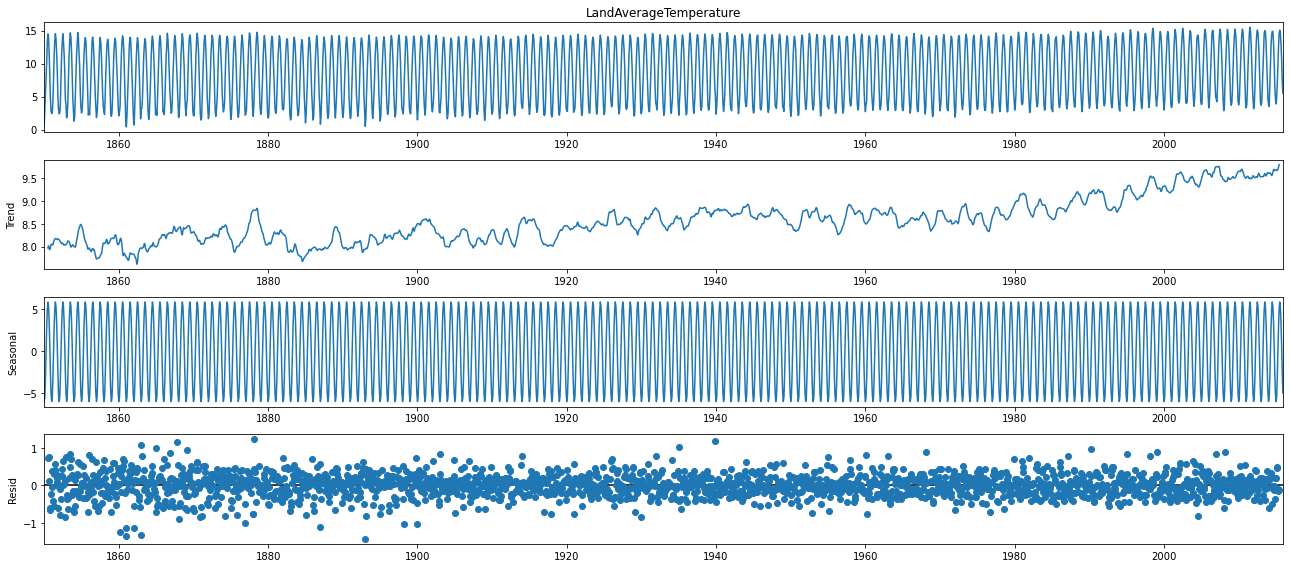

In [11]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# tsa = time series analysis
fig = decomposition.plot()
#fig.savefig('Output/decomposition.png')

In [12]:
# Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, 
#     meaning it is non-stationary. It has some time dependent structure.
# Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, 
#     meaning it is stationary. It does not have time-dependent structure.
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

from statsmodels.tsa.stattools import adfuller
X = Tdata[col[0]].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.455328
p-value: 0.555483
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [13]:
# Null Hypothesis: The process is trend stationary.
# Alternate Hypothesis: The series has a unit root (series is not stationary).
# Test for stationarity: If the test statistic is greater than the critical value, 
#     we reject the null hypothesis (series is not stationary). If the test statistic is 
#     less than the critical value, if fail to reject the null hypothesis (series is stationary). 


from statsmodels.tsa.stattools import kpss
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))
    
# series is non-stationary

KPSS Statistic: 2.333396
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\praso\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [14]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:14648.232239910618
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12071.555258261511
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2711.9692421673435
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1718.884346295325
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2726.5248355473323
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1710.935033027223
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2159.4236375927057
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1718.1731209072504
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:12086.072037326965
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9796.850612654474
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2498.3039225452894
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1455.4123293729735
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2517.9985894197825
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1449.2469893088112
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1923.5460607531402
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1456.2365363736862
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8834.845000426783
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6933.1551123533

In [17]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3231      0.020     16.348      0.000       0.284       0.362
ma.L1         -0.9534      0.008   -116.583      0.000      -0.969      -0.937
ar.S.L12       0.0023      0.019      0.117      0.907      -0.036       0.040
ma.S.L12      -0.9568      0.008   -118.122      0.000      -0.973      -0.941
sigma2         0.1106      0.003     42.930      0.000       0.106       0.116


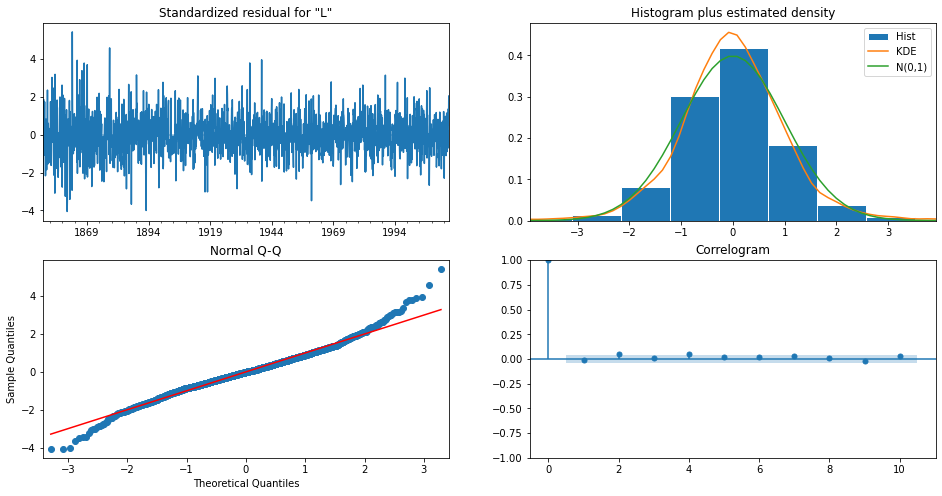

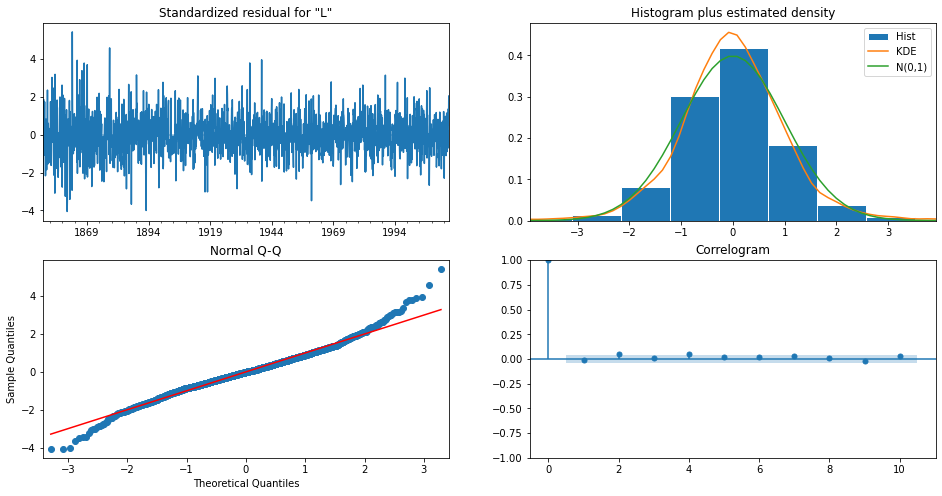

In [18]:
results.plot_diagnostics(figsize=(16, 8))

In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3227      0.020     16.514      0.000       0.284       0.361
ma.L1         -0.9511      0.008   -116.604      0.000      -0.967      -0.935
ar.S.L12      -0.0008      0.000     -1.811      0.070      -0.002    6.61e-05
ma.S.L12      -0.9562      0.008   -125.177      0.000      -0.971      -0.941
sigma2         0.1089      0.003     42.789      0.000       0.104       0.114


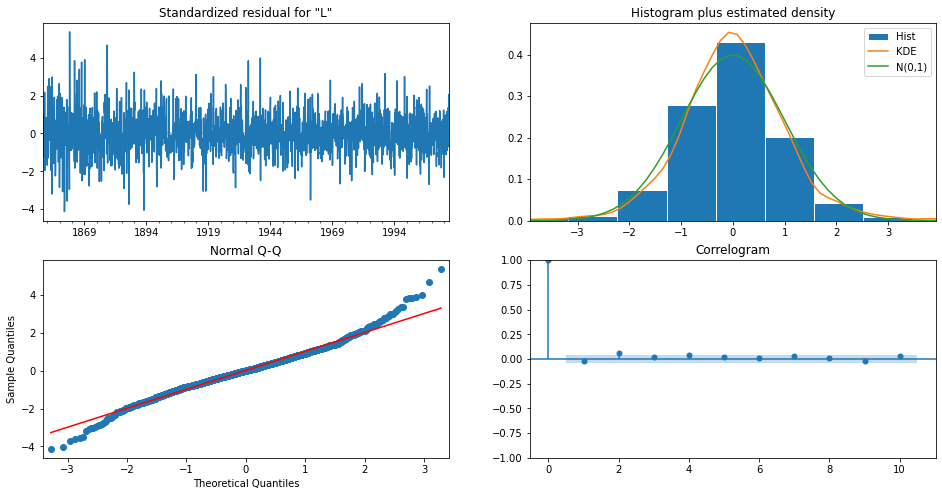

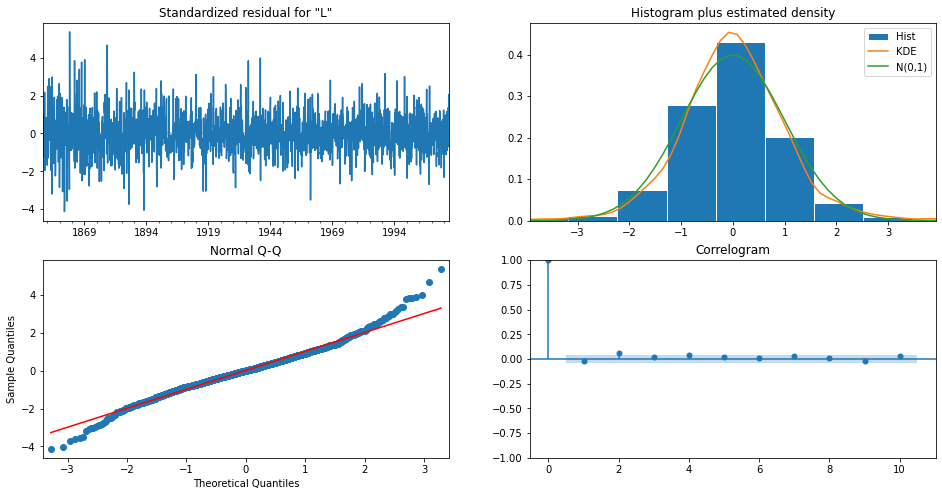

In [20]:
results.plot_diagnostics(figsize=(16, 8))

In [21]:
groups =Tdata[col[0]].groupby(pd.Grouper(freq='A'))

In [22]:
LandAverageTemperature = pd.DataFrame()
for name, group in groups:
    LandAverageTemperature[name.year] = group.values
LandAverageTemperature

,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.749,2.431,2.376,1.786,1.281,2.522,2.760,1.821,2.739,2.015,...,3.286,4.579,2.844,3.687,3.737,3.282,3.157,3.685,3.732,3.881
1,3.071,2.508,2.540,2.228,1.941,2.982,2.226,2.481,2.284,2.611,...,4.430,4.221,3.576,4.094,4.399,3.743,3.628,4.222,3.500,4.664
2,4.954,4.192,3.884,4.078,4.698,4.617,4.372,4.312,4.834,5.023,...,6.329,6.485,6.906,6.086,6.738,6.101,6.023,6.261,6.378,6.740
3,7.217,7.287,7.487,7.541,7.622,8.580,7.751,6.827,8.250,8.542,...,9.055,9.823,9.295,9.367,9.671,9.483,9.676,9.044,9.589,9.313
4,10.004,11.113,11.169,10.975,11.095,11.186,10.530,9.885,10.851,11.456,...,11.786,12.518,12.054,12.112,12.406,11.986,12.590,12.195,12.582,12.312
5,13.150,13.418,13.164,13.410,12.829,12.984,13.496,12.611,12.956,13.142,...,14.443,14.309,14.145,14.201,14.421,14.370,14.492,14.568,14.335,14.505
6,14.492,14.531,14.512,14.645,14.692,13.926,14.019,13.953,13.677,13.827,...,15.042,15.230,15.174,15.231,15.213,15.482,15.076,15.003,14.873,15.051
7,14.039,13.751,13.304,13.953,13.889,13.547,13.021,13.203,13.220,13.217,...,14.913,14.752,14.377,14.655,14.768,15.012,14.720,14.742,14.875,14.755
8,11.505,11.677,11.478,11.710,11.514,11.141,10.948,11.056,11.148,11.080,...,12.875,12.930,12.802,13.153,12.863,12.912,13.040,13.154,13.091,12.999
9,8.091,9.122,8.910,8.535,9.763,8.444,8.087,8.198,8.810,8.834,...,10.289,10.332,10.399,10.136,10.442,10.352,10.428,10.256,10.330,10.801


In [23]:
LandAverageTemperature[LandAverageTemperature.columns[150:]]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,2.950,3.336,4.026,3.981,3.525,3.808,3.286,4.579,2.844,3.687,3.737,3.282,3.157,3.685,3.732,3.881
1,4.184,3.720,4.704,4.085,4.499,3.920,4.430,4.221,3.576,4.094,4.399,3.743,3.628,4.222,3.500,4.664
2,6.219,6.208,6.772,6.048,6.321,6.544,6.329,6.485,6.906,6.086,6.738,6.101,6.023,6.261,6.378,6.740
3,9.552,9.245,9.229,9.154,9.249,9.618,9.055,9.823,9.295,9.367,9.671,9.483,9.676,9.044,9.589,9.313
4,11.874,12.271,12.248,12.153,11.571,12.226,11.786,12.518,12.054,12.112,12.406,11.986,12.590,12.195,12.582,12.312
5,14.060,14.110,14.084,14.017,13.889,14.476,14.443,14.309,14.145,14.201,14.421,14.370,14.492,14.568,14.335,14.505
6,14.848,15.161,15.354,14.983,14.312,15.190,15.042,15.230,15.174,15.231,15.213,15.482,15.076,15.003,14.873,15.051
7,14.519,14.427,14.560,14.691,14.188,14.510,14.913,14.752,14.377,14.655,14.768,15.012,14.720,14.742,14.875,14.755
8,12.547,12.736,12.950,12.911,12.642,13.217,12.875,12.930,12.802,13.153,12.863,12.912,13.040,13.154,13.091,12.999
9,9.486,9.935,9.988,10.424,10.127,10.601,10.289,10.332,10.399,10.136,10.442,10.352,10.428,10.256,10.330,10.801


(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146]),
 [Text(1, 0, '1870'),
  Text(2, 0, '1871'),
  Text(3, 0, '1872'),
  Text(4, 0, '1873'),
  Text(5, 0, '1874'),
  Text(6, 0, '1875'),
  Text(7, 0, '1876'),
  Text(8, 0, '1877

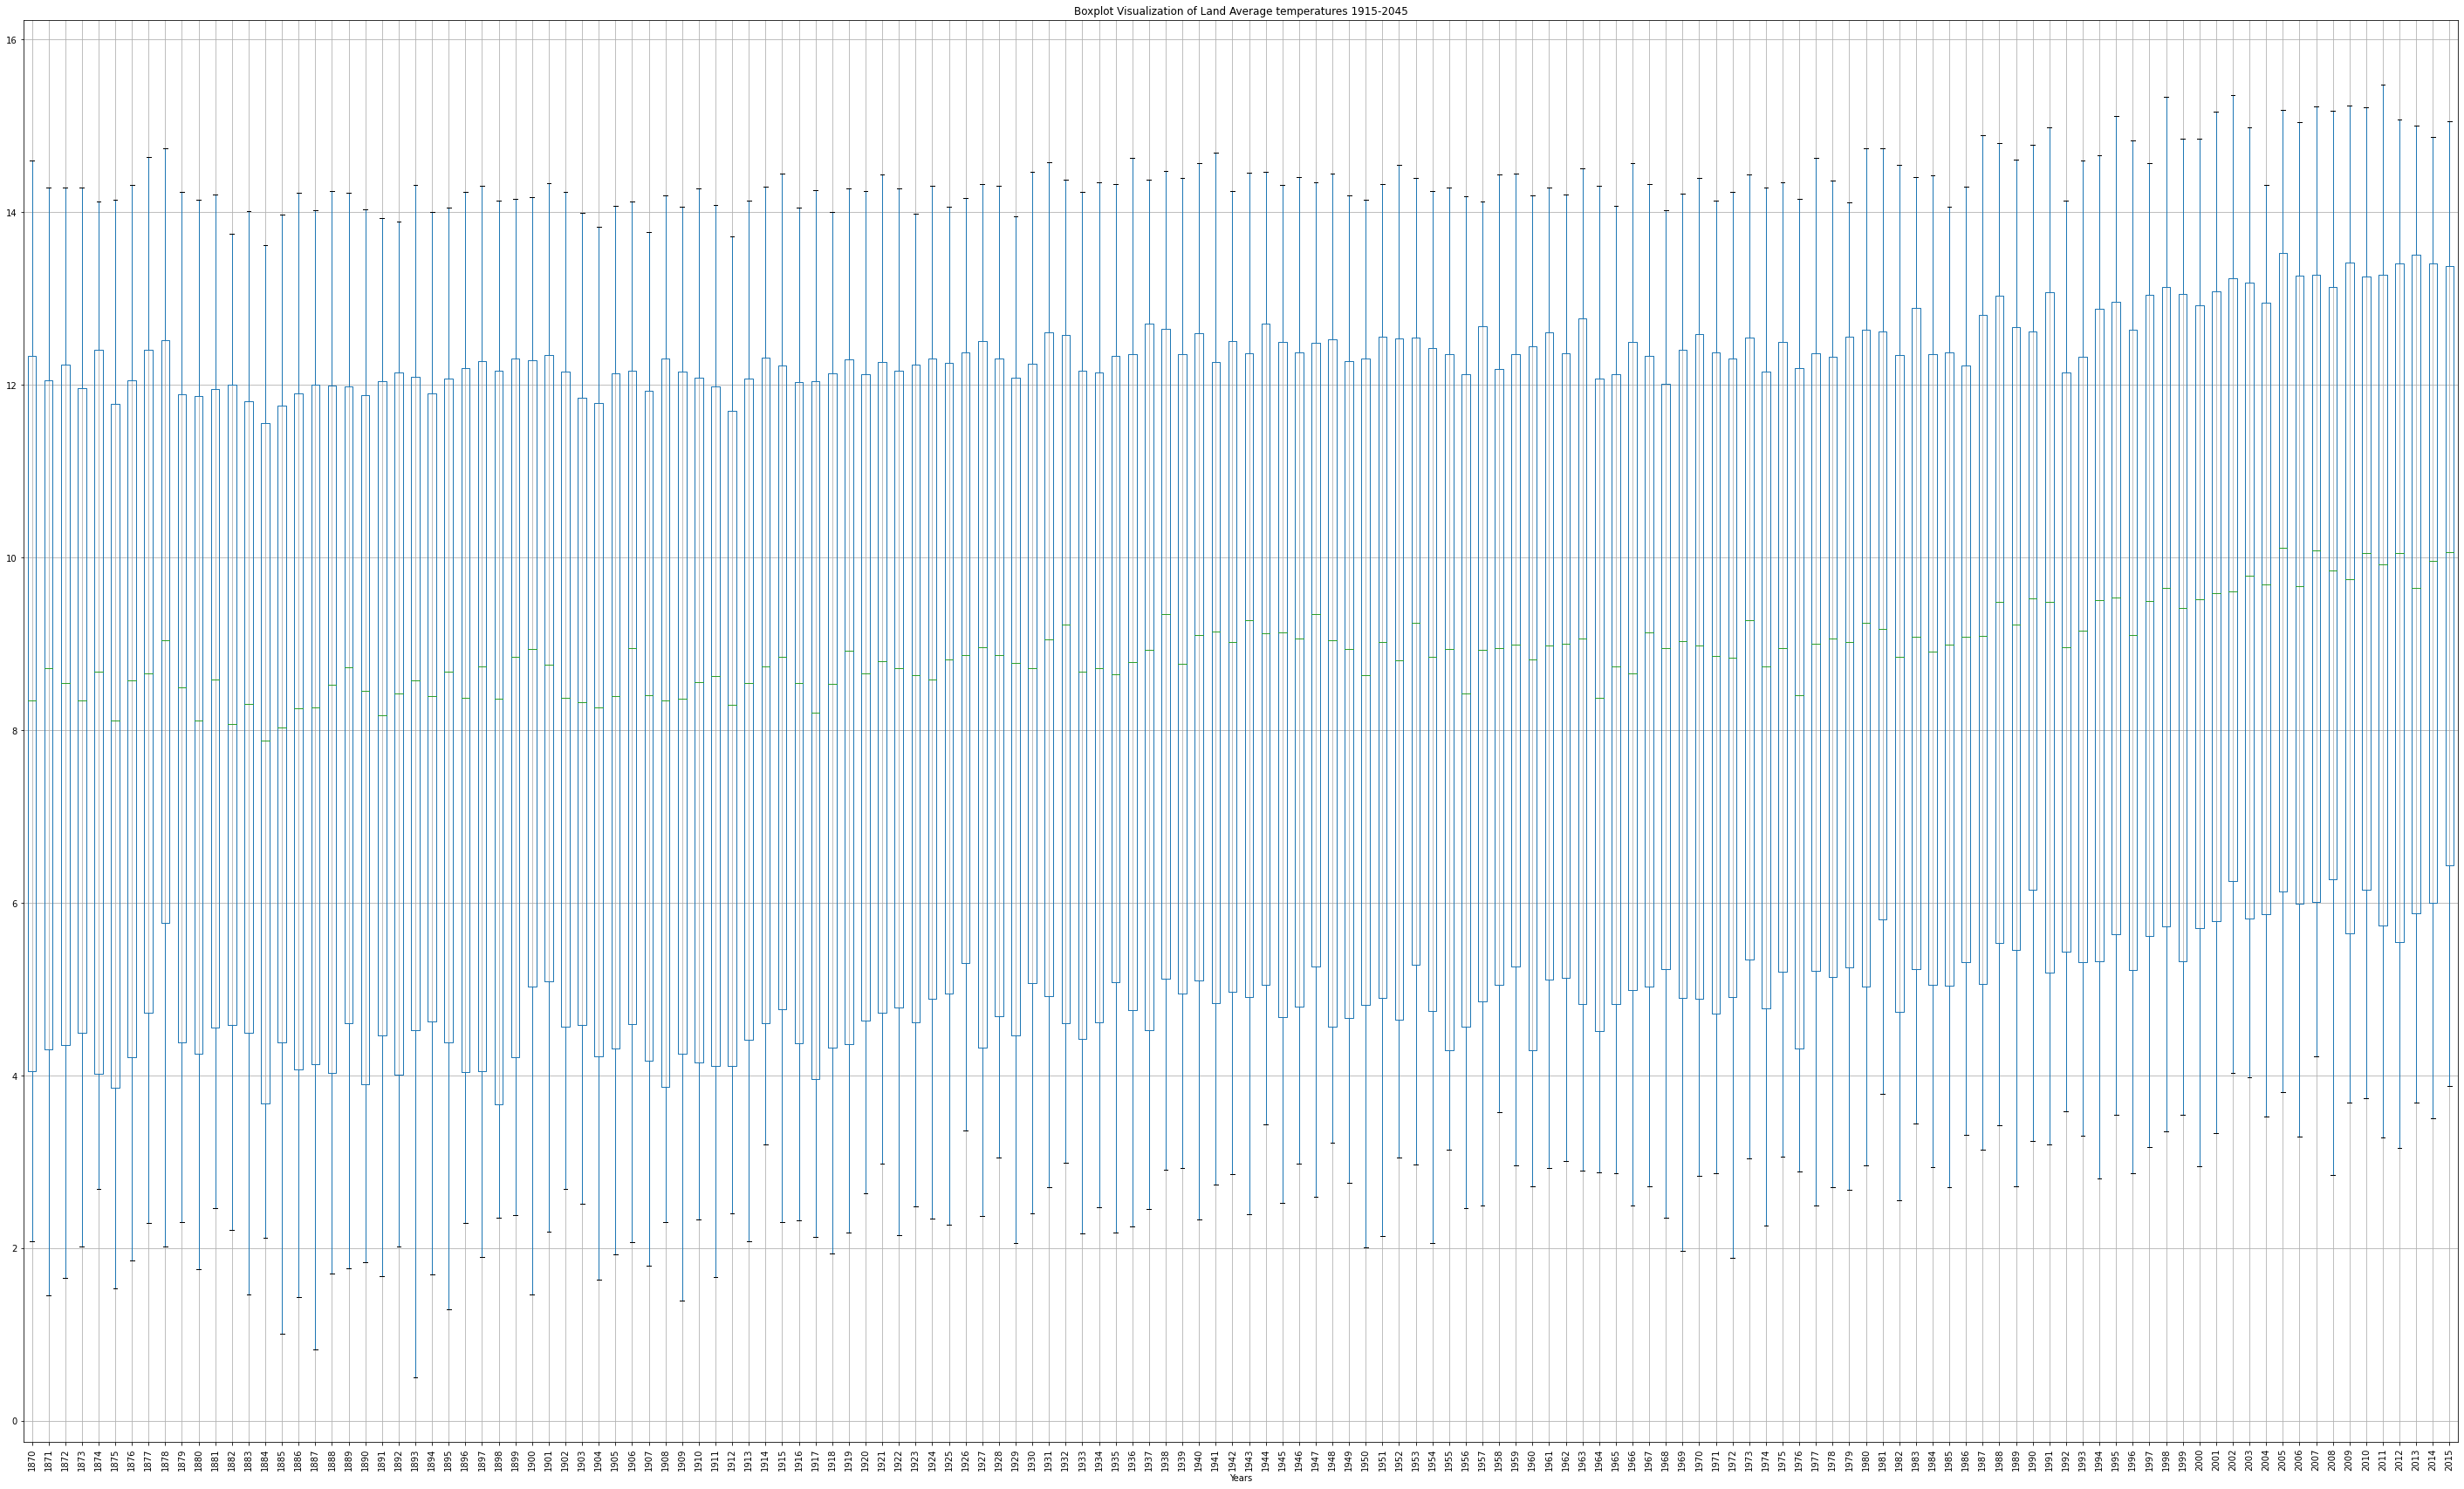

In [120]:
LandAverageTemperature[LandAverageTemperature.columns[20:]].boxplot(figsize = (50, 30))
plt.xlabel('Years')
plt.title('Boxplot Visualization of Land Average temperatures 1915-2045')
plt.xticks(rotation = 90)

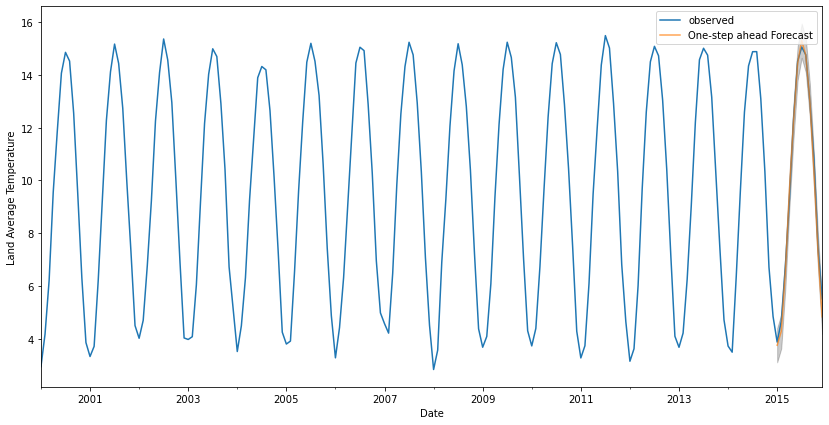

In [123]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Land Average Temperature')
plt.legend()

In [26]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [27]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [31]:
stepwise_fit = auto_arima(Tdata['LandAverageTemperature'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1992
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -808.096
Date:                Sun, 25 Sep 2022   AIC                           1638.192
Time:                        10:36:34   BIC                           1699.752
Sample:                    01-01-1850   HQIC                          1660.800
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5515      0.163      3.389      0.001       0.233       0.870
ar.L2          0.6395      0.220      2.904      0.004       0.208       1.071
ar.L3         -0.1495      0.200     -0.746      0.456      -0.542       0.243
ar.L4         -0.9750      0.207     -4.715      0.000      -1.380      -0.570
ar.L5          0.3292      0.051      6.418      0.000       0.229       0.430
ma.L1         -1.1624      0.163     -7.132      0.000      -1.482      -0.843
ma.L2         -0.5294      0.320     -1.652      0.099      -1.158       0.099
ma.L3          0.5622      0.277      2.032      0.042       0.020       1.104
ma.L4          1.0371      0.321      3.233      0.001       0.408       1.666
ma.L5         -0.8710      0.151     -5.767      0.000      -1.167      -0.575
sigma2         0.1310      0.004     36.802      0.000       0.124       0.138
===================================================================================
Ljung-Box (L1) (Q):                   2.12   Jarque-Bera (JB):               129.57
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
print(Tdata.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1992, 8)
(1962, 8) (30, 8)
LandAverageTemperature                       15.003
LandAverageTemperatureUncertainty             0.126
LandMaxTemperature                           20.737
LandMaxTemperatureUncertainty                 0.100
LandMinTemperature                            9.330
LandMinTemperatureUncertainty                 0.153
LandAndOceanAverageTemperature               17.503
LandAndOceanAverageTemperatureUncertainty     0.068
Name: 1962, dtype: float64 LandAverageTemperature                        5.518
LandAverageTemperatureUncertainty             0.100
LandMaxTemperature                           10.725
LandMaxTemperatureUncertainty                 0.154
LandMinTemperature                            0.287
LandMinTemperatureUncertainty                 0.099
LandAndOceanAverageTemperature               14.774
LandAndOceanAverageTemperatureUncertainty     0.062
Name: 1991, dtype: float64


In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [49]:
model=ARIMA(train['LandAverageTemperature'],
            order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     LandAverageTemperature   No. Observations:                 1962
Model:                     ARIMA(1, 0, 5)   Log Likelihood               -2832.810
Date:                    Sun, 25 Sep 2022   AIC                           5681.620
Time:                            11:07:15   BIC                           5726.274
Sample:                                 0   HQIC                          5698.032
                                   - 1962                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5498      0.065    131.819      0.000       8.423       8.677
ar.L1          0.8312      0.033     25.090      0.000       0.766       0.896
ma.L1          0.8453      0.032     26.750      0.000       0.783       0.907
ma.L2          0.3164      0.042      7.503      0.000       0.234       0.399
ma.L3         -0.4216      0.040    -10.459      0.000      -0.501      -0.343
ma.L4         -0.7647      0.032    -23.941      0.000      -0.827      -0.702
ma.L5         -0.5266      0.022    -23.921      0.000      -0.570      -0.483
sigma2         1.0488      0.038     27.345      0.000       0.974       1.124
===================================================================================
Ljung-Box (L1) (Q):                 109.55   Jarque-Bera (JB):                36.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model=ARIMA(train['LandAverageTemperature'],
            order=(1,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     LandAverageTemperature   No. Observations:                 1962
Model:                     ARIMA(1, 1, 2)   Log Likelihood               -3497.330
Date:                    Sun, 25 Sep 2022   AIC                           7002.660
Time:                            11:12:30   BIC                           7024.985
Sample:                                 0   HQIC                          7010.865
                                   - 1962                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8296      0.017     50.004      0.000       0.797       0.862
ma.L1         -0.2608      0.019    -13.508      0.000      -0.299      -0.223
ma.L2         -0.7384      0.018    -40.857      0.000      -0.774      -0.703
sigma2         2.0676      0.094     21.951      0.000       1.883       2.252
===================================================================================
Ljung-Box (L1) (Q):                 447.62   Jarque-Bera (JB):                59.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.02
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
print(model.summary())

                                 SARIMAX Results                                  
Dep. Variable:     LandAverageTemperature   No. Observations:                 1962
Model:                     ARIMA(1, 1, 2)   Log Likelihood               -3497.330
Date:                    Sun, 25 Sep 2022   AIC                           7002.660
Time:                            11:12:50   BIC                           7024.985
Sample:                                 0   HQIC                          7010.865
                                   - 1962                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8296      0.017     50.004      0.000       0.797       0.862
ma.L1         -0.2608      0.019    -13.508      0.000      -0.299      -0.223
ma.L2         -0.738

In [55]:
#Experimenting on predictions
start=len(train)
end=len(train)+len(test)-1

<AxesSubplot:>

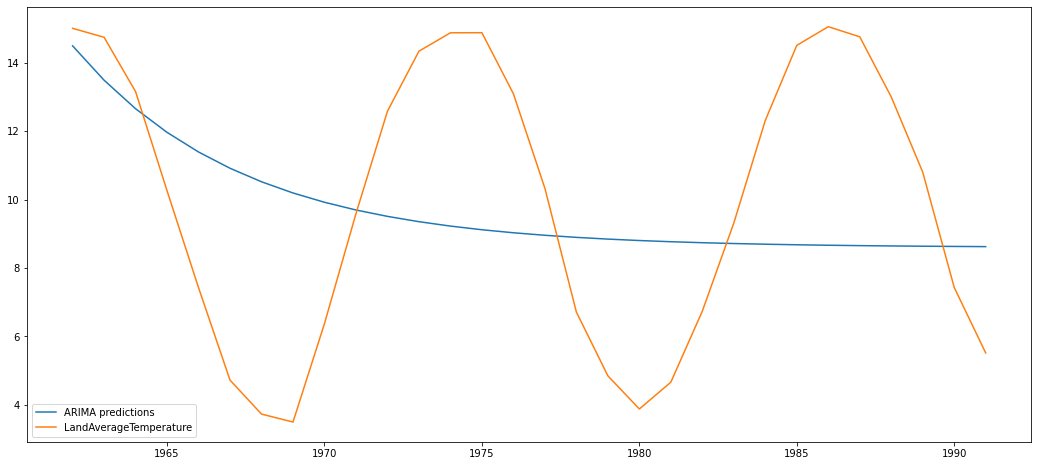

In [57]:
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['LandAverageTemperature'].plot(legend=True)

<AxesSubplot:>

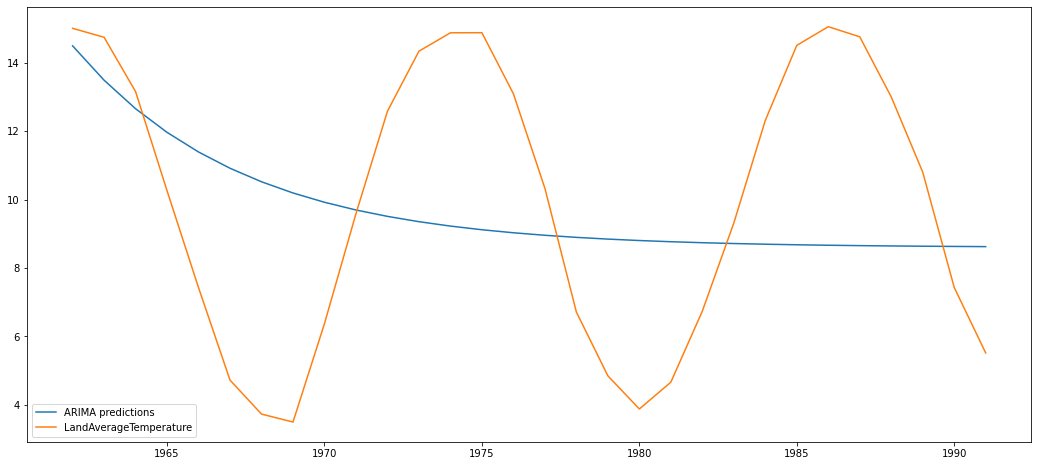

In [59]:
pred.plot(legend='ARIMA Predictions')
test['LandAverageTemperature'].plot(legend=True)

In [60]:
test['LandAverageTemperature'].mean()

9.937433333333333

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['LandAverageTemperature']))
print(rmse)

4.107081659778049


In [62]:
model2=ARIMA(Tdata['LandAverageTemperature'],order=(1,0,5))
model2=model2.fit()
Tdata.tail()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [63]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(Tdata),end=len(Tdata)+30,typ='levels').rename('ARIMA Predictions')

In [64]:
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    5.097433
2018-12-31    6.102645
2019-01-01    7.247650
2019-01-02    7.894946
2019-01-03    7.771477
2019-01-04    7.903809
2019-01-05    8.014065
2019-01-06    8.105929
2019-01-07    8.182467
2019-01-08    8.246238
2019-01-09    8.299370
2019-01-10    8.343639
2019-01-11    8.380523
2019-01-12    8.411254
2019-01-13    8.436858
2019-01-14    8.458191
2019-01-15    8.475965
2019-01-16    8.490774
2019-01-17    8.503113
2019-01-18    8.513393
2019-01-19    8.521959
2019-01-20    8.529095
2019-01-21    8.535041
2019-01-22    8.539995
2019-01-23    8.544123
2019-01-24    8.547562
2019-01-25    8.550427
2019-01-26    8.552814
2019-01-27    8.554803
2019-01-28    8.556461
2019-01-29    8.557841
Freq: D, Name: ARIMA Predictions, dtype: float64


In [79]:
index_future_dates=pd.date_range(start='2022-12-30',end='2023-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(Tdata),end=len(Tdata)+30,typ='levels').rename('ARIMA Predictions')

In [80]:
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-12-30    5.097433
2022-12-31    6.102645
2023-01-01    7.247650
2023-01-02    7.894946
2023-01-03    7.771477
2023-01-04    7.903809
2023-01-05    8.014065
2023-01-06    8.105929
2023-01-07    8.182467
2023-01-08    8.246238
2023-01-09    8.299370
2023-01-10    8.343639
2023-01-11    8.380523
2023-01-12    8.411254
2023-01-13    8.436858
2023-01-14    8.458191
2023-01-15    8.475965
2023-01-16    8.490774
2023-01-17    8.503113
2023-01-18    8.513393
2023-01-19    8.521959
2023-01-20    8.529095
2023-01-21    8.535041
2023-01-22    8.539995
2023-01-23    8.544123
2023-01-24    8.547562
2023-01-25    8.550427
2023-01-26    8.552814
2023-01-27    8.554803
2023-01-28    8.556461
2023-01-29    8.557841
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

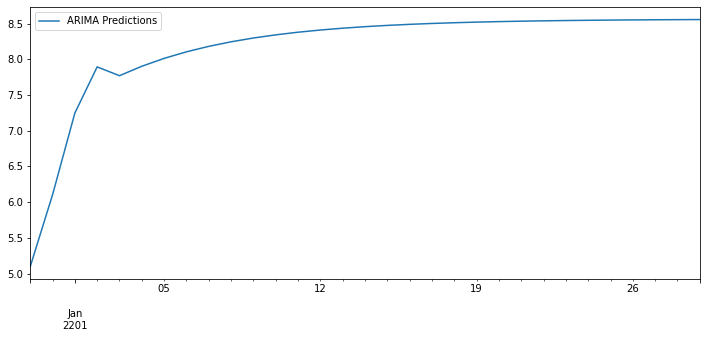

In [92]:
pred.plot(figsize=(12,5),legend=True)

In [83]:
index_future_dates=pd.date_range(start='2050-12-30',end='2051-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(Tdata),end=len(Tdata)+30,typ='levels').rename('ARIMA Predictions')

In [84]:
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2050-12-30    5.097433
2050-12-31    6.102645
2051-01-01    7.247650
2051-01-02    7.894946
2051-01-03    7.771477
2051-01-04    7.903809
2051-01-05    8.014065
2051-01-06    8.105929
2051-01-07    8.182467
2051-01-08    8.246238
2051-01-09    8.299370
2051-01-10    8.343639
2051-01-11    8.380523
2051-01-12    8.411254
2051-01-13    8.436858
2051-01-14    8.458191
2051-01-15    8.475965
2051-01-16    8.490774
2051-01-17    8.503113
2051-01-18    8.513393
2051-01-19    8.521959
2051-01-20    8.529095
2051-01-21    8.535041
2051-01-22    8.539995
2051-01-23    8.544123
2051-01-24    8.547562
2051-01-25    8.550427
2051-01-26    8.552814
2051-01-27    8.554803
2051-01-28    8.556461
2051-01-29    8.557841
Freq: D, Name: ARIMA Predictions, dtype: float64


In [88]:
index_future_dates=pd.date_range(start='2200-12-30',end='2201-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(Tdata),end=len(Tdata)+30,typ='levels').rename('ARIMA Predictions')

In [89]:
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2200-12-30    5.097433
2200-12-31    6.102645
2201-01-01    7.247650
2201-01-02    7.894946
2201-01-03    7.771477
2201-01-04    7.903809
2201-01-05    8.014065
2201-01-06    8.105929
2201-01-07    8.182467
2201-01-08    8.246238
2201-01-09    8.299370
2201-01-10    8.343639
2201-01-11    8.380523
2201-01-12    8.411254
2201-01-13    8.436858
2201-01-14    8.458191
2201-01-15    8.475965
2201-01-16    8.490774
2201-01-17    8.503113
2201-01-18    8.513393
2201-01-19    8.521959
2201-01-20    8.529095
2201-01-21    8.535041
2201-01-22    8.539995
2201-01-23    8.544123
2201-01-24    8.547562
2201-01-25    8.550427
2201-01-26    8.552814
2201-01-27    8.554803
2201-01-28    8.556461
2201-01-29    8.557841
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

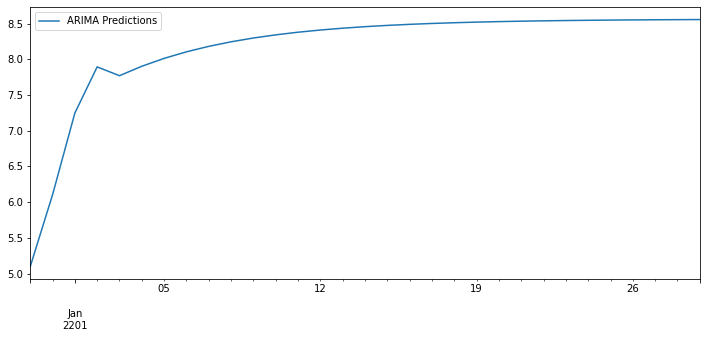

In [90]:
pred.plot(figsize=(12,5),legend=True)

In [93]:
index_future_dates=pd.date_range(start='2900-12-30',end='2901-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(Tdata),end=len(Tdata)+30,typ='levels').rename('ARIMA Predictions')

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2900-12-30 00:00:00

In [114]:
index_future_dates=pd.date_range(start='2251-12-30',end='2252-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(Tdata),end=len(Tdata)+30,typ='levels').rename('ARIMA Predictions')

In [115]:
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2251-12-30    5.097433
2251-12-31    6.102645
2252-01-01    7.247650
2252-01-02    7.894946
2252-01-03    7.771477
2252-01-04    7.903809
2252-01-05    8.014065
2252-01-06    8.105929
2252-01-07    8.182467
2252-01-08    8.246238
2252-01-09    8.299370
2252-01-10    8.343639
2252-01-11    8.380523
2252-01-12    8.411254
2252-01-13    8.436858
2252-01-14    8.458191
2252-01-15    8.475965
2252-01-16    8.490774
2252-01-17    8.503113
2252-01-18    8.513393
2252-01-19    8.521959
2252-01-20    8.529095
2252-01-21    8.535041
2252-01-22    8.539995
2252-01-23    8.544123
2252-01-24    8.547562
2252-01-25    8.550427
2252-01-26    8.552814
2252-01-27    8.554803
2252-01-28    8.556461
2252-01-29    8.557841
Freq: D, Name: ARIMA Predictions, dtype: float64
